## import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## load datasets

In [2]:
# load random undersampling data
X_rus_train = pd.read_csv('data/rus/X_rus_train.csv')
X_rus_test = pd.read_csv('data/rus/X_rus_test.csv')

y_rus_train = pd.read_csv('data/rus/y_rus_train.csv')
y_rus_test = pd.read_csv('data/rus/y_rus_test.csv')

# load random oversampling data
X_ros_train = pd.read_csv('data/ros/X_ros_train.csv')
X_ros_test = pd.read_csv('data/ros/X_ros_test.csv')

y_ros_train = pd.read_csv('data/ros/y_ros_train.csv')
y_ros_test = pd.read_csv('data/ros/y_ros_test.csv')

# load preprocessed original data
X_org_train = pd.read_csv('data/org/X_org_train.csv')
X_org_test = pd.read_csv('data/org/X_org_test.csv')

y_org_train = pd.read_csv('data/org/y_org_train.csv')
y_org_test = pd.read_csv('data/org/y_org_test.csv')

## train decision tree models

a decision tree classifier has the following hyperparameters to tune: 

- max_depth: int
    
    the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- min_samples_split: int, float
    
    the minimum number of samples required to split an internal node. 

- min_samples_leaf : int, float
    
    the minimum number of samples required to be at a leaf node

- max_features: int, float, ['auto', 'sqrt', 'log2']

    the number of features to consider when looking for the best split
    
- max_leaf_nodes: int

- class_weight: dict, list of dict or “balanced”, default=None

    Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data 

In [3]:
SPLITTER = ['best', 'random']
MAX_DEPTH = np.arange(2, 22, step=2)
MIN_SAMPLE_LEAF = np.arange(5, 55, step=5)
MAX_FEATURES = ['auto', None, 'sqrt', 0.95, 0.75, 0.5, 0.25, 0.10]

### decision tree classifier on random undersampling

In [4]:
# dictionary to save each model hyperparameters along with accuracy
dic_model_dtc_rus = dict() 
# keep track of the highest accuracy
best_acc = 0 
# keep track of the model with highest accuracy
best_model = 1 
# the key for dictionary
model_number = 1

In [5]:
for splitter in SPLITTER:
    for max_depth in MAX_DEPTH:
        for min_sample_leaf in MIN_SAMPLE_LEAF:
            for max_features in MAX_FEATURES:
                
                model_dtc = DecisionTreeClassifier(
                    splitter=splitter, max_depth=max_depth, 
                    min_samples_leaf=min_sample_leaf, max_features=max_features
                )

                model_dtc.fit(X_rus_train, y_rus_train)
                
                y_pred = model_dtc.predict(X_rus_test)
                accuracy = accuracy_score(y_true=y_rus_test, y_pred=y_pred)

                dic_model_dtc_rus[model_number] = [accuracy, max_features, min_sample_leaf, max_depth, splitter]

                if accuracy > best_acc:
                    best_acc = accuracy
                    best_model = model_number
                
                model_number += 1

In [6]:
print(f'decision tree classifier with random undersampling {best_acc = }')
print(f'decision tree classifier with random undersampling {best_model = }')
print('decision tree classifier with random undersampling best model hyperparameters',  
      dic_model_dtc_rus[best_model])

decision tree classifier with random undersampling best_acc = 0.7283111685496311
decision tree classifier with random undersampling best_model = 542
decision tree classifier with random undersampling best model hyperparameters [0.7283111685496311, 0.5, 40, 14, 'best']


In [17]:
# plot each model's accuracy
ACC = []
max_features_ = []
min_sample_leaf_ = []
max_depth_ = [] 

for model in dic_model_dtc_rus.keys():
    ACC.append(dic_model_dtc_rus[model][0])
    max_features_.append(dic_model_dtc_rus[model][1])
    min_sample_leaf_.append(dic_model_dtc_rus[model][2])
    max_depth_.append(dic_model_dtc_rus[model][3])

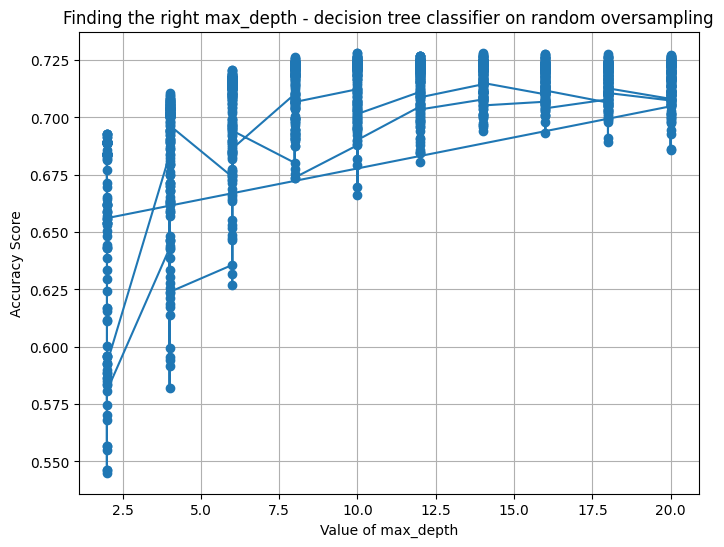

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_, ACC, marker = "o")
plt.xlabel("Value of max_depth")
plt.ylabel("Accuracy Score")
plt.title("Finding the right max_depth - decision tree classifier on random oversampling")
plt.grid()

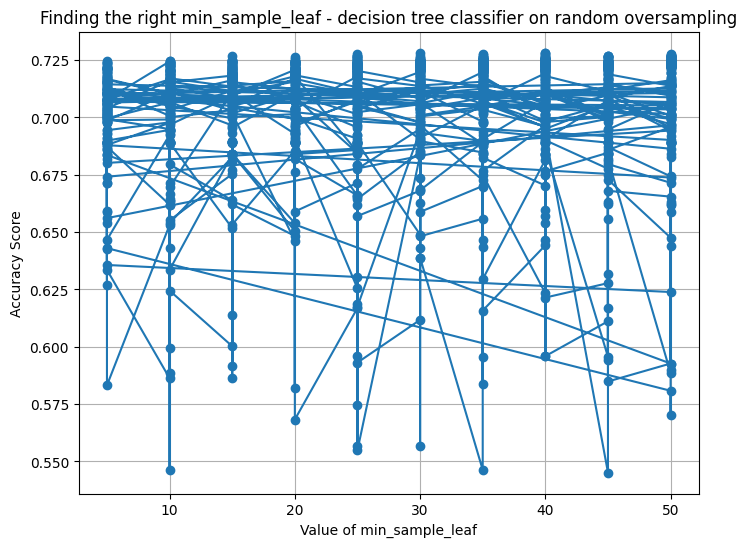

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(min_sample_leaf_, ACC, marker = "o")
plt.xlabel("Value of min_sample_leaf")
plt.ylabel("Accuracy Score")
plt.title("Finding the right min_sample_leaf - decision tree classifier on random oversampling")
plt.grid()

### decision tree classifier on random oversampling

In [8]:
# dictionary to save each model hyperparameters along with accuracy
dic_model_dtc_ros = dict() 
# keep track of the highest accuracy
best_acc = 0 
# keep track of the model with highest accuracy
best_model = 1 
# the key for dictionary
model_number = 1

In [9]:
for splitter in SPLITTER:
    for max_depth in MAX_DEPTH:
        for min_sample_leaf in MIN_SAMPLE_LEAF:
            for max_features in MAX_FEATURES:
                
                model_dtc = DecisionTreeClassifier(
                    splitter=splitter, max_depth=max_depth, 
                    min_samples_leaf=min_sample_leaf, max_features=max_features
                )

                model_dtc.fit(X_ros_train, y_ros_train)
                
                y_pred = model_dtc.predict(X_ros_test)
                accuracy = accuracy_score(y_true=y_ros_test, y_pred=y_pred)

                dic_model_dtc_ros[model_number] = [accuracy, max_features, min_sample_leaf, max_depth, splitter]

                if accuracy > best_acc:
                    best_acc = accuracy
                    best_model = model_number
                
                model_number += 1

In [10]:
print(f'decision tree classifier with random oversampling {best_acc = }')
print(f'decision tree classifier with random oversampling {best_model = }')
print('decision tree classifier with random oversampling best model hyperparameters',  
      dic_model_dtc_ros[best_model])

decision tree classifier with random oversampling best_acc = 0.7832821200729984
decision tree classifier with random oversampling best_model = 722
decision tree classifier with random oversampling best model hyperparameters [0.7832821200729984, None, 5, 20, 'best']


In [11]:
# plot each model's accuracy
ACC = []
max_features_ = []
min_sample_leaf_ = []
max_depth_ = [] 

for model in dic_model_dtc_ros.keys():
    ACC.append(dic_model_dtc_ros[model][0])
    max_features_.append(dic_model_dtc_ros[model][1])
    min_sample_leaf_.append(dic_model_dtc_ros[model][2])
    max_depth_.append(dic_model_dtc_ros[model][3])

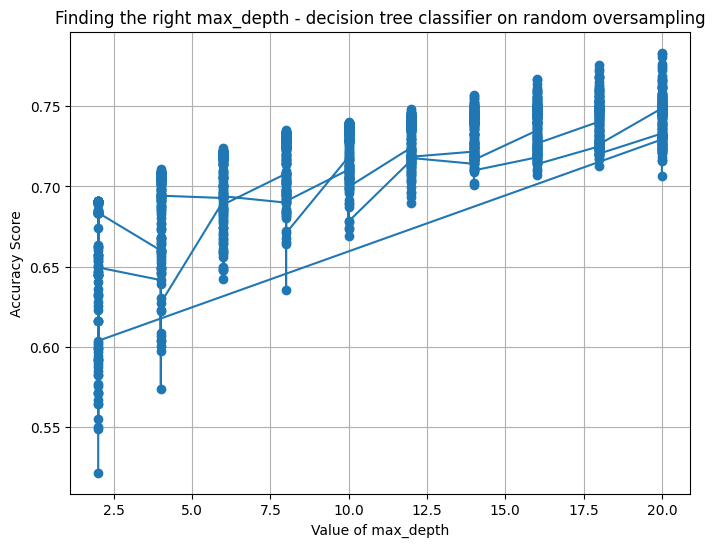

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_, ACC, marker = "o")
plt.xlabel("Value of max_depth")
plt.ylabel("Accuracy Score")
plt.title("Finding the right max_depth - decision tree classifier on random oversampling")
plt.grid()

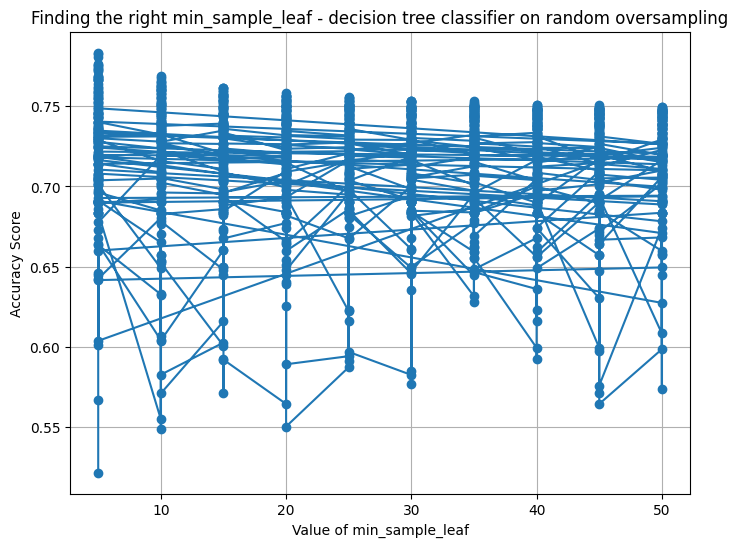

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(min_sample_leaf_, ACC, marker = "o")
plt.xlabel("Value of min_sample_leaf")
plt.ylabel("Accuracy Score")
plt.title("Finding the right min_sample_leaf - decision tree classifier on random oversampling")
plt.grid()

## save models performance report

In [20]:
df_rus_model = pd.DataFrame(dic_model_dtc_rus)
df_ros_model = pd.DataFrame(dic_model_dtc_ros)

df_rus_model.to_csv('findings/decision_tree/df_rus_model.csv', index=False)
df_ros_model.to_csv('findings/decision_tree/df_ros_model.csv', index=False)